# Downloading Data

Matthes, E. (2023). 16 Downloading Data. In *Python Crash Course* (3rd ed.). No Starch Press.

Resources: https://github.com/ehmatthes/pcc_3e/tree/main

Downloading datasets from online sources and working visualizations of that data.

## Index



## The CSV file format

### Parsing the CSV File Headers



In [1]:
### Lets examine the first line of csv file, the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() # reading the file and we get a list of all lines in the file with 'splitlines()'

reader = csv.reader(lines) # process the first line of comma-separated valies and stores as a list
header_row = next(reader) # the 'next()' function show the next line in the file, starts for the beggining
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


### Printing the Headers and their positions


In [2]:
### Printing heach position of the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

for index, column_header in enumerate(header_row): # Enumerate function returns both the index of each item and the value of each intem
    print(index, column_header)


0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


### Extracting and reading Data


In [3]:
### reading data from csv

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader] # new list 'highs' with a loop
# it beggins in the second line because previously we reed the headers row
# we pull the tdata from index 4 on each loop pass
# and we convert the data into integer with 'int()'

print(highs)



[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


### Plotting data ina temperature chard


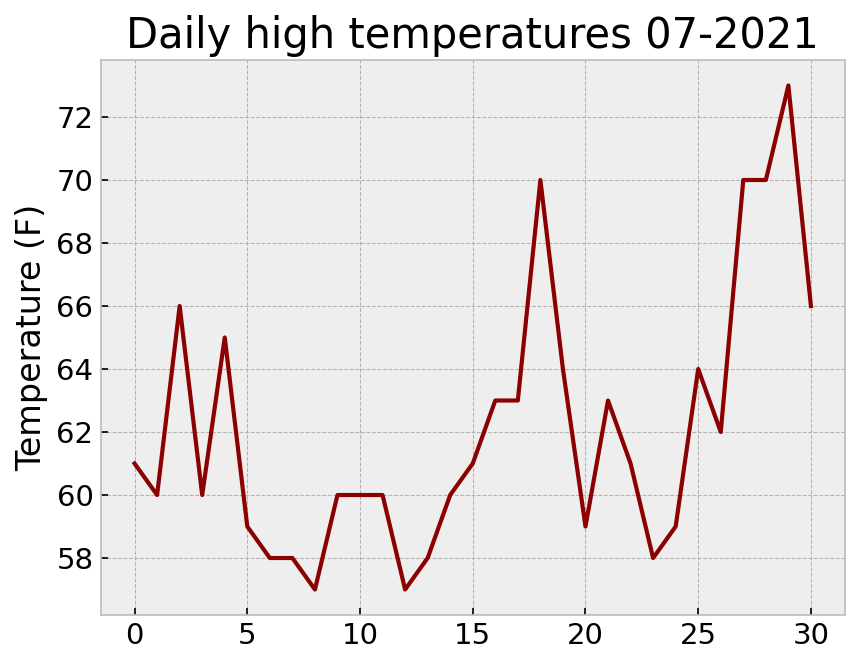

In [8]:
from pathlib import Path 
import csv 

import matplotlib.pyplot as plt

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader]

plt.style.use('bmh')
fig, ax = plt.subplots(dpi=150)
ax.plot(highs, color="darkred")

# Format plot
ax.set_title("Daily high temperatures 07-2021", fontsize=20)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=14)

plt.show()

In [1]:
from pathlib import Path 

import pandas as pd
import plotly.express as px

path = Path("weather_data/sitka_weather_07-2021_simple.csv")

reader = pd.read_csv(path) # we use pandas to reed the csv

# High temperatures
fig = px.line(reader, x='DATE', y='TMAX', title="Daily high temperatures 07-2021", color_discrete_sequence=["darkred"], width=900)
# x and y are the labels from the csv file

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Temperature (°F)")
fig.update_legends(title_text="Temp")

fig.show()